<a href="https://colab.research.google.com/github/RobinTeotia/Machine-Learning-with-Python/blob/main/RobinTeotia_Assignment2_Cardiotocography_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis: 
KNN algorithm gives better accury scores in comparison to ensambles methods for classification of Cardiotocography Data Set.

# Importing Data & Libraries.

In [ ]:
#Importing data 
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pp
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns

from sklearn import datasets
import io
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 500)

# Cardiotocography Data




*   The dataset consists of measurements of fetal heart rate (FHR) and uterine 

contraction (UC) features on cardiotocograms classified by expert obstetricians
*   2126 measurements and classifications of fotetal heart rate(FHR) signals.

*   The (cardiotocograms) CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. …) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.Here I used my data set for the classification of fetal state







## About the features of the data set

**FileName**:	 of CTG examination		
**Date**    :  of the examination		
**b **      :  start instant		
**e  **     :  end instant		
**LBE **    :  baseline value (medical expert)	
**LB	**    :  baseline value (SisPorto)	
**AC**	    :  accelerations (SisPorto)	
**FM**	    :  foetal movement (SisPorto)	
**UC **     :  uterine contractions (SisPorto)	
**ASTV**	  :  percentage of time with abnormal short term variability          (SisPorto)

**mSTV**	  : mean value of short term variability  (SisPorto)

**ALTV**	  : percentage of time with abnormal long term variability  (SisPorto)

**mLTV**	  : mean value of long term variability  (SisPorto)

**DL**	    : light decelerations		
**DS**	    : severe decelerations		
**DP**      :	prolongued decelerations	
**DR**	    : repetitive decelerations	
**Width**	  : histogram width		
**Min	**    : low freq. of the histogram	
**Max**	    : high freq. of the histogram	
**Nmax**	  : number of histogram peaks	
**Nzeros**	: number of histogram zeros	
**Mode**	  : histogram mode		
**Mean**	  : histogram mean		
**Median**	    : histogram median		
**Variance**	  : histogram variance		
**Tendency**    :	histogram tendency: -1=left assymetric; 0=symmetric; 1=right assymetric

**A**	          : calm sleep		
B      :	REM sleep		
C      :  calm vigilance		
D      :  active vigilance		
SH     :	shift pattern (A or Susp with shifts)

AD     :	accelerative/decelerative pattern (stress situation)

DE     :	decelerative pattern (vagal stimulation)

LD     :	largely decelerative pattern	

FS     :	flat-sinusoidal pattern (pathological state)

SUSP   :	suspect pattern		
CLASS  : 	Class code (1 to 10) for classes A to SUSP

NSP    :	Normal=1; Suspect=2; Pathologic=3



# Data Exploration

In [ ]:
#Reading the file
path="/content/drive/MyDrive/CTG.xls"
df=pd.read_excel(path,sheet_name=2,skiprows=0)
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [ ]:
df.columns # watching the attributes of the data set.

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [ ]:
df.shape #Shape of the data

(2130, 40)

In [ ]:
df.head() #first five rows of the data set

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


# Data Cleaning, Descriptive Statistics and Visualization.

Droping unnecessary columns

In [ ]:
df=df.drop(labels=['FileName','Date','SegFile','DR','A', 'B', 'C', 'D', 'E','b', 'e','LBE','SUSP'],axis=1) # Droping the columns which I think will fail to give any productive results.

In [ ]:
df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,AD,DE,LD,FS,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0.0,0.0,0.0,6.0,1.0


In [ ]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'AD', 'DE', 'LD', 'FS', 'CLASS', 'NSP'],
      dtype='object')

In [ ]:
df=df.drop(0)       # droping the entire first row having all nul values.
#df=df.drop(labels='index',axis=1)
df=df.reset_index() #reseting index

In [ ]:
df.head()    # again vizualising the data

,index,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,AD,DE,LD,FS,CLASS,NSP
0,1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,1.0,9.0,2.0
1,2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
2,3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0
3,4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0.0,0.0,0.0,6.0,1.0
4,5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,0.0,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [ ]:
#df[['CLASS']].value_counts()
df['NSP'].value_counts()  #Checking our target

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

Visualisaton of the unbalanced classes to see ratio of their spread.

Text(0, 0.5, 'Classes')

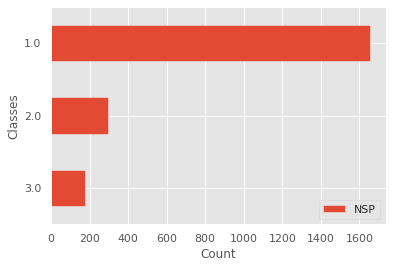

In [ ]:
df.NSP.value_counts().sort_values().plot(kind = 'barh',legend='NSP')
plt.xlabel("Count")
plt.ylabel("Classes")

Having three classes Normal=1; Suspect=2; Pathologic=3, but the classes are unbalanced so to peoperly learn the modal I need to Cross Validate the data and Startified Kfold I want to use, as it deals with imbalanced classes in a proportionate way. 

In [ ]:
Class_names=['Normal','Suspect','Pathologic']

In [ ]:
df.info()  # getting information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     2129 non-null   int64  
 1   LB        2126 non-null   float64
 2   AC        2126 non-null   float64
 3   FM        2127 non-null   float64
 4   UC        2127 non-null   float64
 5   ASTV      2127 non-null   float64
 6   MSTV      2127 non-null   float64
 7   ALTV      2127 non-null   float64
 8   MLTV      2127 non-null   float64
 9   DL        2128 non-null   float64
 10  DS        2128 non-null   float64
 11  DP        2128 non-null   float64
 12  Width     2126 non-null   float64
 13  Min       2126 non-null   float64
 14  Max       2126 non-null   float64
 15  Nmax      2126 non-null   float64
 16  Nzeros    2126 non-null   float64
 17  Mode      2126 non-null   float64
 18  Mean      2126 non-null   float64
 19  Median    2126 non-null   float64
 20  Variance  2126 non-null   floa

In [ ]:
df.describe()   # Descriptive statistics of the data

,index,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,AD,DE,LD,FS,CLASS,NSP
count,2129.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1065.000000,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,8.207616,1.576128,0.003759,0.127820,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.156162,0.118532,0.050329,0.032455,4.509878,1.304327
std,614.733682,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,5.701926,2.517794,0.061213,0.471687,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.363094,0.323314,0.218675,0.177248,3.026883,0.614377
min,1.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,533.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,4.600000,0.000000,0.000000,0.000000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,1065.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,7.400000,0.000000,0.000000,0.000000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1597.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,10.800000,3.000000,0.000000,0.000000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,2129.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,50.700000,16.000000,1.000000,4.000000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [ ]:
df.corr()  # watching correlation between tha variables.

,index,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,AD,DE,LD,FS,CLASS,NSP
index,1.000000,-0.131156,0.121697,-0.143893,0.491011,0.144248,0.140244,-0.226377,-0.305992,0.352777,0.069524,0.199310,-0.004073,-0.014349,-0.032481,-0.007916,-0.010260,-0.181015,-0.283501,-0.194597,0.167150,-0.130494,0.154601,0.130776,0.228009,-0.188308,-0.073503,-0.109482
LB,-0.131156,1.000000,-0.077967,-0.033305,-0.127722,0.305570,-0.279607,0.285630,-0.032091,-0.155908,-0.053518,-0.117133,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,-0.130368,-0.030849,-0.122136,0.069885,0.143001,0.148151
AC,0.121697,-0.077967,1.000000,0.053956,0.212100,-0.197985,0.191378,-0.345162,-0.128901,-0.011350,-0.039341,-0.110317,0.291516,-0.157447,0.373493,0.191475,-0.011430,0.221693,0.236811,0.250729,0.111981,0.032235,0.264657,-0.255090,-0.140998,-0.140062,-0.255205,-0.340394
FM,-0.143893,-0.033305,0.053956,1.000000,0.010623,-0.095019,0.172669,-0.038904,0.069739,0.110411,0.099984,0.247217,0.171448,-0.158422,0.111228,0.183904,-0.014632,-0.037492,-0.085718,-0.056281,0.177793,-0.000069,0.113454,0.001145,0.089162,-0.003765,0.077805,0.060366
UC,0.491011,-0.127722,0.212100,0.010623,1.000000,-0.071354,0.248094,-0.229877,-0.080503,0.351366,0.068483,0.174308,0.152990,-0.112597,0.146645,0.095512,0.022701,-0.077695,-0.169739,-0.111041,0.184188,-0.060995,0.243954,0.084710,0.113672,-0.205653,-0.073465,-0.163295
ASTV,0.144248,0.305570,-0.197985,-0.095019,-0.071354,1.000000,-0.419104,0.461544,-0.302416,-0.030443,0.049515,0.061727,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,-0.198840,-0.132195,0.137192,0.308643,0.284580,0.471191
MSTV,0.140244,-0.279607,0.191378,0.172669,0.248094,-0.419104,1.000000,-0.450527,0.094506,0.525126,0.080278,0.304793,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,0.284401,0.259776,0.275303,-0.210904,0.077214,-0.103382
ALTV,-0.226377,0.285630,-0.345162,-0.038904,-0.229877,0.461544,-0.450527,1.000000,-0.152700,-0.251200,0.004957,-0.120312,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,-0.205648,-0.117518,-0.123011,0.478205,0.303050,0.426146
MLTV,-0.305992,-0.032091,-0.128901,0.069739,-0.080503,-0.302416,0.094506,-0.152700,1.000000,-0.226125,0.022283,-0.195390,0.110942,-0.144976,0.002023,0.056357,0.123869,0.072071,0.137813,0.063228,-0.164079,0.153093,-0.082898,-0.022701,-0.225276,-0.104933,-0.228310,-0.226797
DL,0.352777,-0.155908,-0.011350,0.110411,0.351366,-0.030443,0.525126,-0.251200,-0.226125,1.000000,0.156767,0.309295,0.520656,-0.539125,0.242187,0.393860,0.208487,-0.315463,-0.509446,-0.353878,0.515130,-0.000687,0.430801,0.446887,0.332372,-0.114025,0.395887,0.065328


Vizualizing the correlation

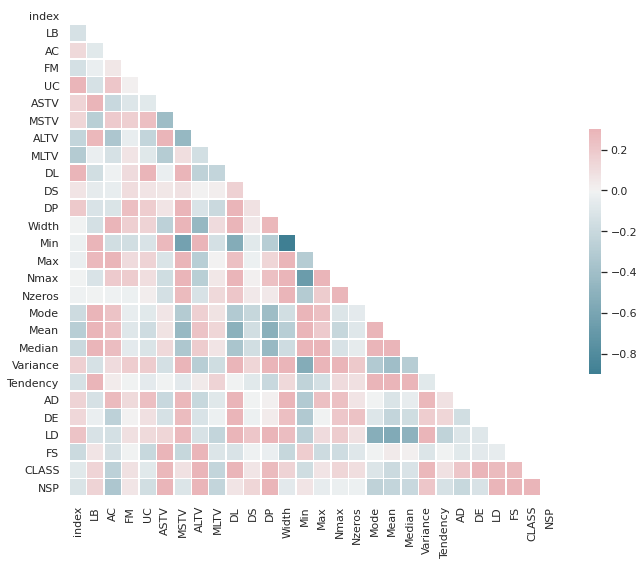

In [ ]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the vizualisation it can be clarly seen that the correlation between the attributes "NSP" and "Class" is very high. 


*   The attributes 'LBE' and 'LB' also fall in high correlation with the  'Mode', 'Median' and 'Mean'.
*   The attributes 'Min' and 'width' have the lowest correlation.

*   The correlation tells how the two variables are related to each other, it is prefered to have varibleas with low correlation to get the better learned modal for the best prediction.







Removing Null values:

In [ ]:
df.dropna(inplace=True) # the daaframe has some null values so removing them.
df.shape

(2126, 28)

In [ ]:
for col in df.columns:  # Visulising the data inside the attribute and their frequency.  
    print(df[col].value_counts())

2047    1
1350    1
1322    1
1324    1
1326    1
       ..
641     1
643     1
645     1
647     1
2049    1
Name: index, Length: 2126, dtype: int64
133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
144.0     77
142.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
123.0     56
131.0     56
143.0     56
148.0     52
121.0     44
141.0     39
139.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
156.0      4
157.0      4
117.0      2
160.0      1
Name: LB, dtype: int64
0.0     891
1.0     242
2.0     164
3.0     162
4.0     148
5.0     110
6.0     104
7.0      76
8.0      56
9.0      50
10.0     40
12.0     17
11.0     16
13.0     15
14.0     13
17.0      7
15.0      5

In [ ]:
X = df.drop(['NSP'], axis=1) # Setting the Input
y = df['NSP']                # Deciding Target
Features_names=X.columns     # Storing features names
Features_names

Index(['index', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'AD', 'DE', 'LD', 'FS', 'CLASS'],
      dtype='object')

# Feature Scaling

Standardisation is needed to make the X variables comparable to each other.

In [ ]:
X = pp.StandardScaler().fit(X).transform(X.astype(float))

# Classification

Since the classes are imbalanced so applying stratified Kfold cross validation.

In [ ]:
from sklearn.model_selection import  StratifiedKFold #KFold, ShuffleSplit,
k = 10
#cv = KFold(n_splits = k, shuffle = True)
#cv = ShuffleSplit(n_splits = k, test_size=1/k)
cv = StratifiedKFold(n_splits = k, shuffle = True,random_state=55)

for train_index, test_index in cv.split(X,y): #y is only necessary for stratified splits
  print(train_index, "/", test_index)

[   0    1    2    3    4    5    6    7    8   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   29   30   32   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   53   54   55   56   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   95   97   98   99  100  101  102  103  105  106  107  108  109  110  112  113  114  115  117  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  172  173  174  175  176  177  178  179  181  183  184  185  186  187  188  189  191  192  193  194  195  196  197  198  199  201  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220

In [ ]:
for train_index, test_index in cv.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

Watching the spread of data under different Kernels to see if any of them can help us represent the data.Here I tried to use different Kernels tought in class to see the best fit kernel.

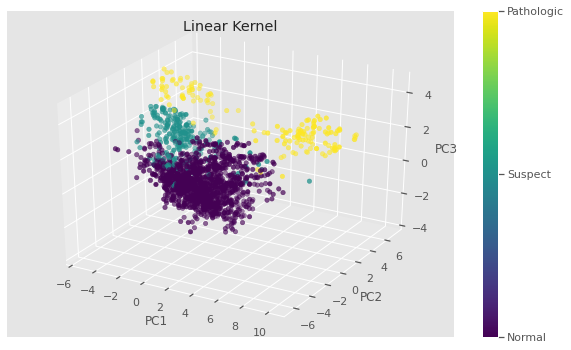

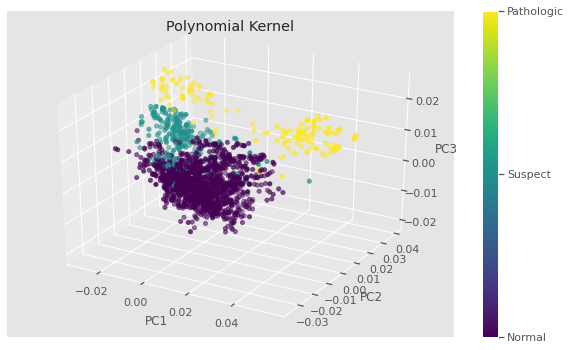

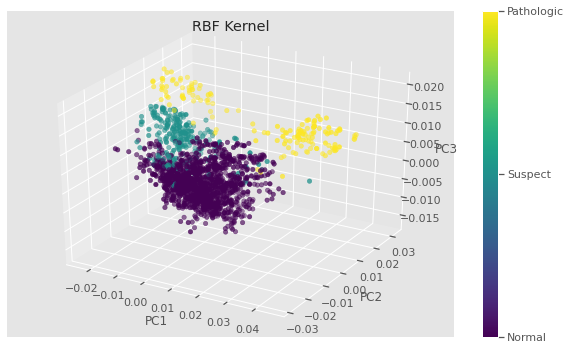

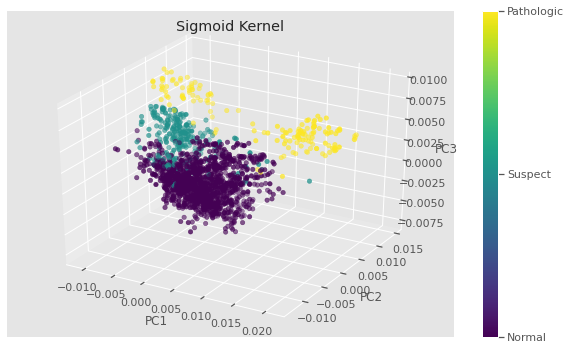

In [ ]:
from sklearn.decomposition import KernelPCA

names = [
         'Linear Kernel',
         'Polynomial Kernel',
         'RBF Kernel',
         'Sigmoid Kernel']

classifiers = [
    KernelPCA(n_components = 3, kernel = 'linear'),
    KernelPCA(n_components = 3, kernel = 'poly', gamma= 0.00001),
    KernelPCA(n_components = 3, kernel = 'rbf', gamma= 0.00001),
    KernelPCA(n_components = 3, kernel = 'sigmoid', gamma= 0.00001)]

models=zip(names,classifiers)
   
for name, kpca in models:
    X_PCA = kpca.fit_transform(X_train)
    
    from mpl_toolkits.mplot3d import axes3d
    from matplotlib import style
    style.use('ggplot')
    
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(111, projection='3d')
    loc = [1,2,3]
    classes = ['Normal','Suspect','Pathologic']
    x3d = X_PCA[:,0]
    y3d = X_PCA[:,1]
    z3d = X_PCA[:,2]

    plot = ax1.scatter(x3d, y3d, z3d, c=y_train, cmap="viridis")
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    cb = plt.colorbar(plot)
    cb.set_ticks(loc)
    cb.set_ticklabels(classes)

    plt.title(name)
    plt.show()

# Appling KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Zero One loss:",metrics.zero_one_loss(y_test, yhat))

Train set Accuracy:  0.9806687565308255
Test set Accuracy:  0.9622641509433962
Zero One loss: 0.037735849056603765



**What about other K?**

*  K in KNN, is the number of nearest neighbors to examine.  




In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.96226415, 0.95283019, 0.97169811, 0.96226415, 0.97169811, 0.96226415, 0.97169811, 0.96226415, 0.96698113])

Ploting model accuracy for Different number of Neighbors

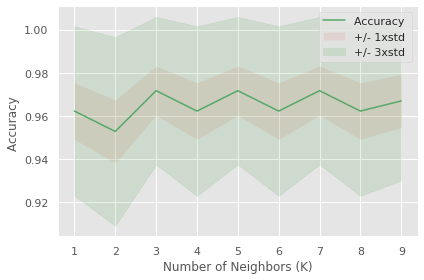

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

So the curve predicting that we have few values of K which is giving good accuracy.

The KNN Algorithm is giving almost 99% accuracy for the classification.


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
clf # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.fit(X_train,y_train)
predTree = clf.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[3. 1. 3. 1. 1.]
0     2.0
13    1.0
23    3.0
32    1.0
49    1.0
Name: NSP, dtype: float64


In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Zero One loss Accuracy:",metrics.zero_one_loss(y_test, predTree))

DecisionTrees's Accuracy:  0.9905660377358491
Zero One loss Accuracy: 0.009433962264150941


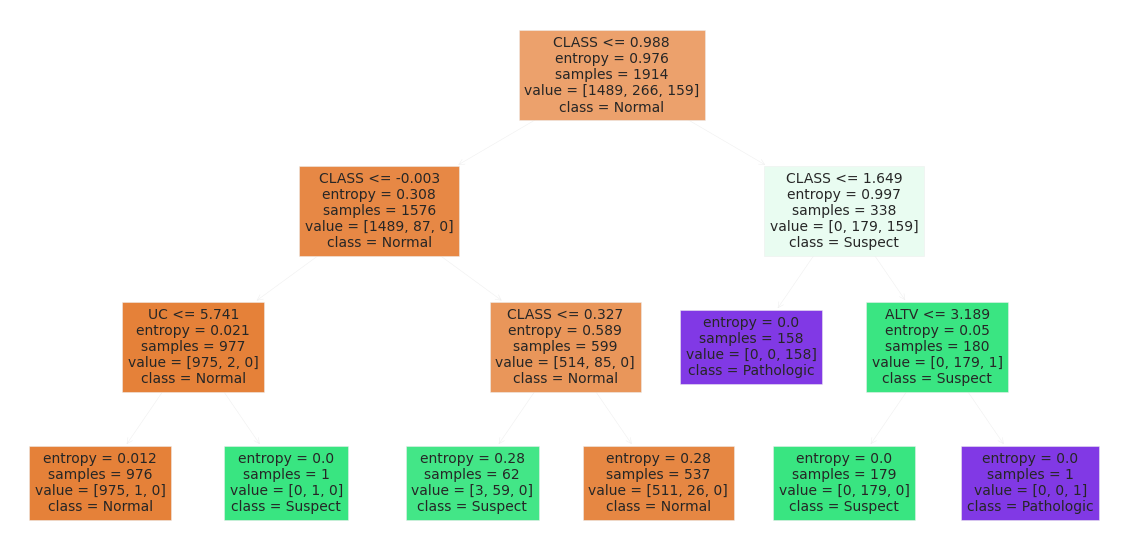

In [ ]:
plt.figure( figsize=(20,10) )
_ = tree.plot_tree( clf,
               feature_names = Features_names,
               class_names = Class_names,
               filled = True)

At the depth of 3, most of the leaves are having entropy equal to 0.Hence It classifing the data very well. 

In [ ]:
!pip install dtreeviz

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


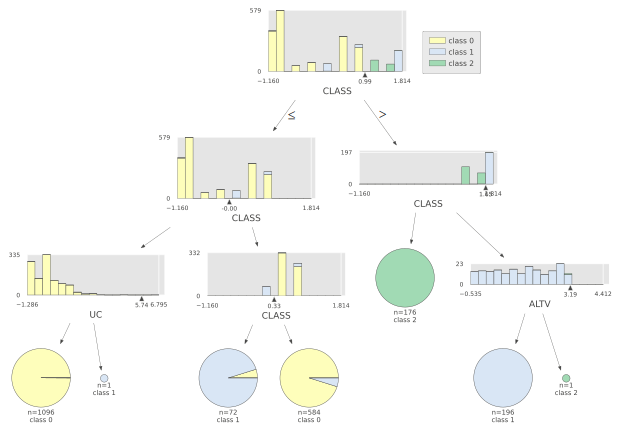

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(clf, X, y, feature_names = Features_names)

viz

#Ensemble Method

Ensemble learning is a machine learning paradigm where multiple models (often called weak learners or base models) are trained to solve the same problem and combined to get better performances

* There are two most fundamental things to be expected, low variance and low bias for a modal for better prediction.  
* We also need a good Degree of Freedom to resolve the underlying complexity of the data.
* These all fall under well known bias-variance tradeoff dealt with the help of ensables method.


Verifying which ensemble method has highest accuracy.

In [ ]:
  import sklearn.ensemble as en
  clfs = [ tree.DecisionTreeClassifier(),
          en.BaggingClassifier(n_estimators=500),
          en.RandomForestClassifier(n_estimators=500),
          en.AdaBoostClassifier(n_estimators=500),
          en.GradientBoostingClassifier(n_estimators=500) ]

  for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(type(clf), ": ", metrics.accuracy_score(y_test,y_pred))
    print(type(clf),"Zero One loss Accuracy:",metrics.zero_one_loss(y_test, y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> :  0.9716981132075472
<class 'sklearn.tree._classes.DecisionTreeClassifier'> Zero One loss Accuracy: 0.028301886792452824
<class 'sklearn.ensemble._bagging.BaggingClassifier'> :  0.9764150943396226
<class 'sklearn.ensemble._bagging.BaggingClassifier'> Zero One loss Accuracy: 0.02358490566037741
<class 'sklearn.ensemble._forest.RandomForestClassifier'> :  0.9811320754716981
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Zero One loss Accuracy: 0.018867924528301883
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> :  0.9764150943396226
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Zero One loss Accuracy: 0.02358490566037741
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> :  0.9952830188679245
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> Zero One loss Accuracy: 0.004716981132075526


All ensemble methods produced 98% accuracy whereas KNN Classifier had 99% accuracy.

It is quite evident that for this given data set the KNN algorith gives the better result than ensambles methods.

#PCA

In [ ]:
from sklearn.model_selection import  StratifiedKFold #KFold, ShuffleSplit,
k = 10
#cv = KFold(n_splits = k, shuffle = True)
#cv = ShuffleSplit(n_splits = k, test_size=1/k)
cv = StratifiedKFold(n_splits = k, shuffle = True,random_state=55)

for train_index, test_index in cv.split(X,y): #y is only necessary for stratified splits
  print(train_index, "/", test_index)
  
for train_index, test_index in cv.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

[   0    1    2    3    4    5    6    7    8   10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   29   30   32   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   53   54   55   56   58   59   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   77   79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   95   97   98   99  100  101  102  103  105  106  107  108  109  110  112  113  114  115  117  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  172  173  174  175  176  177  178  179  181  183  184  185  186  187  188  189  191  192  193  194  195  196  197  198  199  201  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA()
#pca = PCA(2)
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
pca.components_

array([[ 1.06742420e-01, -1.95627891e-01,  3.49099659e-02,  7.96296736e-02,  1.20887309e-01, -1.14761854e-01,  2.94106067e-01, -1.96362688e-01, -3.04598067e-02,  2.74668055e-01,  6.00151323e-02,  2.16957575e-01,  2.93791858e-01, -3.07963565e-01,  1.30482233e-01,  2.38179857e-01,  1.13270987e-01, -2.45327433e-01, -2.95806468e-01, -2.59922717e-01,  2.84348973e-01, -6.66246784e-02,  1.33610885e-01,  1.21249281e-01,  2.15265902e-01, -9.40105165e-02,  8.29535317e-02],
       [ 8.12412507e-02, -2.05455369e-01, -2.68058280e-01, -5.45484496e-02, -4.36656404e-02,  1.75595117e-01, -1.41488966e-01,  1.80309194e-01, -1.40384353e-01, -2.19181821e-02,  8.61476657e-02,  1.48522637e-01, -2.69245266e-01,  1.55084460e-01, -3.29037345e-01, -2.25957430e-01, -1.21474122e-01, -3.37953217e-01, -2.97538559e-01, -3.38374160e-01, -6.21419979e-02, -2.26478485e-01, -1.60255066e-01, -2.09815955e-02,  2.04327201e-01,  1.52705908e-01,  8.49226436e-02],
       [-2.22065946e-02,  3.60087389e-01, -1.55030736e-01,  5.86

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Zero One loss :",metrics.zero_one_loss(y_test, yhat))

Train set Accuracy:  0.9681295715778474
Test set Accuracy:  0.9575471698113207
Zero One loss : 0.04245283018867929


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.96226415, 0.95754717, 0.97169811, 0.96226415, 0.96226415, 0.95754717, 0.96226415, 0.95754717, 0.96226415])

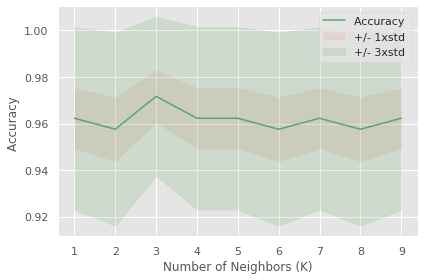

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
clf.fit(X_train,y_train)
predTree = clf.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Zero One loss :",metrics.zero_one_loss(y_test, predTree))

DecisionTrees's Accuracy:  0.9056603773584906
Zero One loss : 0.09433962264150941


In [ ]:
  import sklearn.ensemble as en
  clfs = [ tree.DecisionTreeClassifier(),
          en.BaggingClassifier(n_estimators=500),
          en.RandomForestClassifier(n_estimators=500),
          en.AdaBoostClassifier(n_estimators=500),
          en.GradientBoostingClassifier(n_estimators=500) ]

  for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(type(clf), ": ", metrics.accuracy_score(y_test,y_pred))
    print(type(clf),"Zero One loss :",metrics.zero_one_loss(y_test, y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> :  0.9386792452830188
<class 'sklearn.tree._classes.DecisionTreeClassifier'> Zero One loss : 0.061320754716981174
<class 'sklearn.ensemble._bagging.BaggingClassifier'> :  0.9669811320754716
<class 'sklearn.ensemble._bagging.BaggingClassifier'> Zero One loss : 0.03301886792452835
<class 'sklearn.ensemble._forest.RandomForestClassifier'> :  0.9528301886792453
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Zero One loss : 0.047169811320754707
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> :  0.9056603773584906
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Zero One loss : 0.09433962264150941
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> :  0.9716981132075472
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> Zero One loss : 0.028301886792452824


#Smote Method

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1.0: 1323, 2.0: 236, 3.0: 141}

I am thinking to produce synthetic data to balance the classes.For this I am using over_sampling tool.

<BarContainer object of 3 artists>

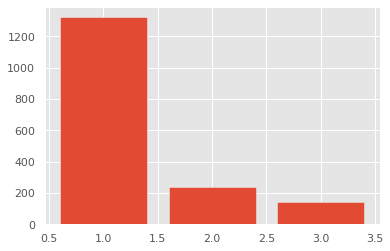

In [ ]:
plt.figure()
plt.bar(unique,counts)

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
           
X_train, y_train = sm.fit_sample(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1.0: 1323, 2.0: 1323, 3.0: 1323}

<BarContainer object of 3 artists>

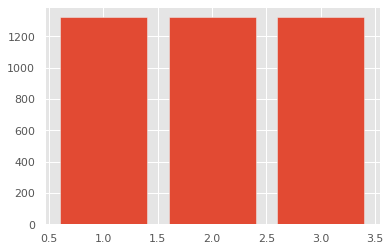

In [ ]:
plt.figure()
plt.bar(unique,counts)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Zero One loss :",metrics.zero_one_loss(y_test, yhat))

Train set Accuracy:  0.9901738473167044
Test set Accuracy:  0.9788732394366197
Zero One loss : 0.021126760563380254


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
clf.fit(X_train,y_train)
predTree = clf.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("Zero One loss :",metrics.zero_one_loss(y_test, predTree))

DecisionTrees's Accuracy:  0.9553990610328639
Zero One loss : 0.04460093896713613


In [ ]:
  import sklearn.ensemble as en
  clfs = [ tree.DecisionTreeClassifier(),
          en.BaggingClassifier(n_estimators=500),
          en.RandomForestClassifier(n_estimators=500),
          en.AdaBoostClassifier(n_estimators=500),
          en.GradientBoostingClassifier(n_estimators=500) ]

  for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(type(clf), ": ", metrics.accuracy_score(y_test,y_pred))
    print(type(clf),"Zero One loss :",metrics.zero_one_loss(y_test, y_pred))

<class 'sklearn.tree._classes.DecisionTreeClassifier'> :  0.9835680751173709
<class 'sklearn.tree._classes.DecisionTreeClassifier'> Zero One loss : 0.016431924882629123
<class 'sklearn.ensemble._bagging.BaggingClassifier'> :  0.9882629107981221
<class 'sklearn.ensemble._bagging.BaggingClassifier'> Zero One loss : 0.011737089201877882
<class 'sklearn.ensemble._forest.RandomForestClassifier'> :  0.9859154929577465
<class 'sklearn.ensemble._forest.RandomForestClassifier'> Zero One loss : 0.014084507042253502
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> :  0.8169014084507042
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> Zero One loss : 0.18309859154929575
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> :  0.9882629107981221
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> Zero One loss : 0.011737089201877882


#Conclusion

Classification of Cardiotocography Data Set is best carried out by using a Gradient Boosting Classifier and Random Forest Classifier. After caring out all the variations in the computational steps, all the ensemble techniques give comparatively best results when compared to KNN algorithm except Adaboost classifier which fails to perform well. However, Principal Component Analysis does not improve the accuracy of the scores but reduce the computation time.Therefore, after applying the StratifiedKfold Cross Validation,PCA and Smote Method,It is quite evident from the results that I have to reject my hypothesis that KNN is better than ensambles methods.

